Write code to simulate requests coming from clients and distribute them among the servers 
using the load balancing algorithms. 

In [1]:
import random

# Define servers with weights and active connections
servers = [
    {'name': 'Server1', 'weight': 2, 'connections': 0},
    {'name': 'Server2', 'weight': 1, 'connections': 0},
    {'name': 'Server3', 'weight': 3, 'connections': 0},
]

# Simulate client requests
requests = ['Request' + str(i) for i in range(1, 11)]  # 10 client requests

# ---------- Round Robin ----------
print("----- Round Robin Load Balancing -----")
server_index = 0
for req in requests:
    assigned_server = servers[server_index]['name']
    print(f"{req} --> {assigned_server}")
    server_index = (server_index + 1) % len(servers)

# ---------- Random Selection ----------
print("\n----- Random Selection Load Balancing -----")
for req in requests:
    assigned_server = random.choice(servers)['name']
    print(f"{req} --> {assigned_server}")

# ---------- Weighted Round Robin ----------
print("\n----- Weighted Round Robin Load Balancing -----")
# Expand servers list based on weights
weighted_servers = []
for server in servers:
    weighted_servers.extend([server['name']] * server['weight'])

server_index = 0
for req in requests:
    assigned_server = weighted_servers[server_index]
    print(f"{req} --> {assigned_server}")
    server_index = (server_index + 1) % len(weighted_servers)

# ---------- Least Connections ----------
print("\n----- Least Connections Load Balancing -----")
# Reset connections
for server in servers:
    server['connections'] = 0

for req in requests:
    # Find server with least connections
    least_conn_server = min(servers, key=lambda s: s['connections'])
    least_conn_server['connections'] += 1  # Add one connection
    print(f"{req} --> {least_conn_server['name']}")

# Show final connection counts
print("\nFinal connections per server:")
for server in servers:
    print(f"{server['name']}: {server['connections']} connections")


----- Round Robin Load Balancing -----
Request1 --> Server1
Request2 --> Server2
Request3 --> Server3
Request4 --> Server1
Request5 --> Server2
Request6 --> Server3
Request7 --> Server1
Request8 --> Server2
Request9 --> Server3
Request10 --> Server1

----- Random Selection Load Balancing -----
Request1 --> Server1
Request2 --> Server3
Request3 --> Server1
Request4 --> Server3
Request5 --> Server1
Request6 --> Server3
Request7 --> Server1
Request8 --> Server1
Request9 --> Server2
Request10 --> Server3

----- Weighted Round Robin Load Balancing -----
Request1 --> Server1
Request2 --> Server1
Request3 --> Server2
Request4 --> Server3
Request5 --> Server3
Request6 --> Server3
Request7 --> Server1
Request8 --> Server1
Request9 --> Server2
Request10 --> Server3

----- Least Connections Load Balancing -----
Request1 --> Server1
Request2 --> Server2
Request3 --> Server3
Request4 --> Server1
Request5 --> Server2
Request6 --> Server3
Request7 --> Server1
Request8 --> Server2
Request9 --> Server3

In [2]:
#EXTRA OPTIONAL


----- Least Connections Load Balancing with Threads -----
Request1 --> Server1 (processing...)
Request2 --> Server2 (processing...)
Request3 --> Server3 (processing...)
Request4 --> Server1 (processing...)
Request5 --> Server2 (processing...)
Request6 --> Server3 (processing...)
Request7 --> Server1 (processing...)
Request8 --> Server2 (processing...)
Request9 --> Server3 (processing...)
Request10 --> Server1 (processing...)
Request11 --> Server2 (processing...)
Request12 --> Server3 (processing...)
Request13 --> Server1 (processing...)
Request14 --> Server2 (processing...)
Request15 --> Server3 (processing...)
Request16 --> Server1 (processing...)
Request17 --> Server2 (processing...)
Request18 --> Server3 (processing...)
Request19 --> Server1 (processing...)
Request20 --> Server2 (processing...)
Request3 --> Server3 (completed)
Request18 --> Server3 (completed)
Request19 --> Server1 (completed)
Request20 --> Server2 (completed)
Request2 --> Server2 (completed)
Request17 --> Server2 

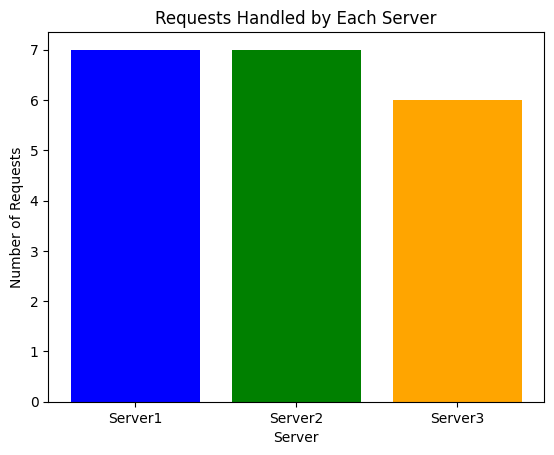

In [3]:
import random
import threading
import time
import matplotlib.pyplot as plt

# Define servers with weights and active connections
servers = [
    {'name': 'Server1', 'weight': 2, 'connections': 0, 'handled': 0},
    {'name': 'Server2', 'weight': 1, 'connections': 0, 'handled': 0},
    {'name': 'Server3', 'weight': 3, 'connections': 0, 'handled': 0},
]

# Simulate client requests
requests = ['Request' + str(i) for i in range(1, 21)]  # 20 client requests

# Simulate random processing time (1-3 seconds)
def process_request(server, req):
    server['connections'] += 1
    server['handled'] += 1
    print(f"{req} --> {server['name']} (processing...)")
    time.sleep(random.uniform(1, 3))  # simulate work
    server['connections'] -= 1
    print(f"{req} --> {server['name']} (completed)")

# ---------- Least Connections with Threading ----------
print("\n----- Least Connections Load Balancing with Threads -----")
threads = []

for req in requests:
    # Find server with least connections
    least_conn_server = min(servers, key=lambda s: s['connections'])
    t = threading.Thread(target=process_request, args=(least_conn_server, req))
    threads.append(t)
    t.start()

# Wait for all threads to finish
for t in threads:
    t.join()

# Show final request handling count
print("\nFinal handled requests per server:")
for server in servers:
    print(f"{server['name']}: {server['handled']} requests")

# ---------- Plotting ----------
server_names = [server['name'] for server in servers]
handled_counts = [server['handled'] for server in servers]

plt.bar(server_names, handled_counts, color=['blue', 'green', 'orange'])
plt.title('Requests Handled by Each Server')
plt.xlabel('Server')
plt.ylabel('Number of Requests')
plt.show()